# 1. Tensorflow 버전 확인(사용할 라이브러리 버전 확인)

In [5]:
# 그래프, 연산처리
import numpy as np # tensorflow와 많이 충돌할 수 있으므로 버전 확인 필수
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow 처리
import tensorflow as tf 
from tensorflow import keras

# 학습 시간 확인
import time

# Tensorflow 모델 설계
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

# 2. 버전 확인

In [6]:
# 버전 확인
print("tensorflow : ", tf.__version__)
print("numpy : ", np.__version__)

tensorflow :  2.16.1
numpy :  1.26.4


# 3. 그래프 작성

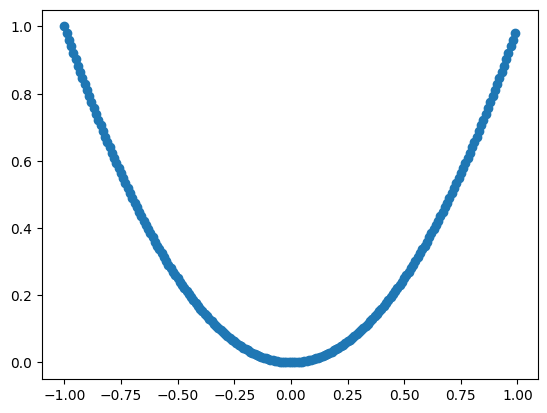

In [7]:
x = np.arange(-1, 1, 0.01)
y = x**2

plt.scatter(x, y)

# 4. 데이터 구조 확인

In [8]:
print("데이터 크기(x) : ", len(x))
print("데이터 구조(x) : ", x.shape)

데이터 크기(x) :  200
데이터 구조(x) :  (200,)


# 5. 간단한 Tensorflow 모델 생성

In [9]:
# 모델 정의
model = keras.Sequential() # 보통 함수로 생성
model.add(Input([1]))
model.add(Dense(10, activation='tanh')) # 노드가 1개일 경우 학습 불가
model.add(Dense(10, activation='tanh')) # 히든레이어
model.add(Dense(10, activation='tanh')) # 1. 히든레이어가 없는 경우 -> 결과 = 상수함수
model.add(Dense(10, activation='tanh')) # 2. 노드를 절반으로 줄인 경우(10 -> 5) ->
model.add(Dense(1))

In [10]:
# 컴파일
model.compile(optimizer = 'SGD', loss = 'mse')

In [11]:
# 시간 체크
start_time = time.time() # 시작

# 학습
model.fit(x, y, epochs=500, verbose=0, batch_size=20) # batch_size는 학습에 영향을 준다

# 학습 종료
print("학습 시간 : {}".format(time.time() - start_time)) # 현재시간 - 시작시간 = 학습시간

학습 시간 : 13.933170080184937


In [12]:
# 예측
rst = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


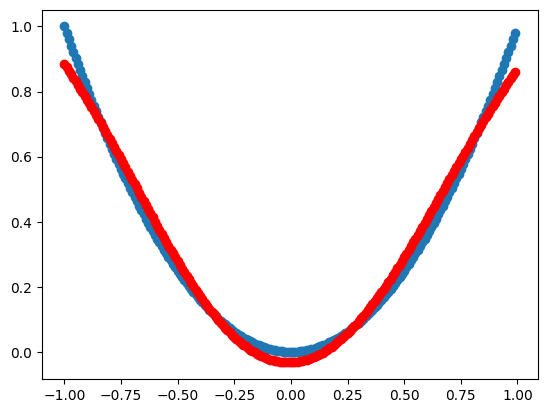

In [13]:
# 결과를 그래프로 확인
plt.scatter(x, y) # 실제 그래프(정답)
plt.scatter(x, rst, color='r') # 예측 결과값
plt.savefig('wo_hiddenLayer.png') # 그래프를 저장할 때 먼저 저장 후 plt.show()
plt.show()

# 테스트셋으로 평가

In [14]:
x = np.arange(-1, 1, 0.01)
np.random.shuffle(x) # 데이터를 섞어야 좋은 결과가 나옴
y = x**2

In [15]:
# 데이터 분리
# 데이터 양이 많은 경우 -> train, test, valid(validation data)
split_index = int(x.shape[0]*0.7) # 7 : 3으로 나눌 때
split_index

140

In [16]:
# 데이터 분리 처리
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((140,), (60,), (140,), (60,))

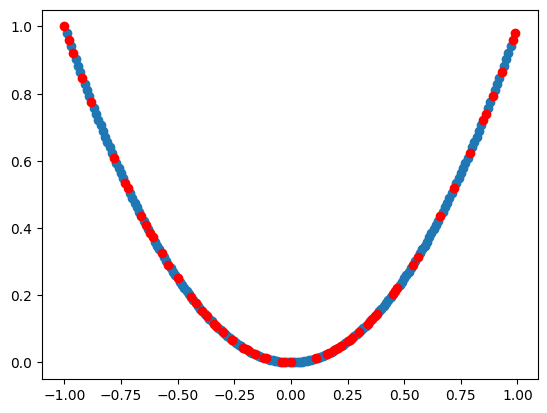

In [17]:
# 데이터를 섞었을 때 데이터가 어떻게 표시되는지 확인
plt.scatter(train_x, train_y) 
plt.scatter(test_x, test_y, color='r') 
# 그래프 저장
plt.savefig('img_test.png') # 그래프를 저장할 때 먼저 저장 후 plt.show()
plt.show()

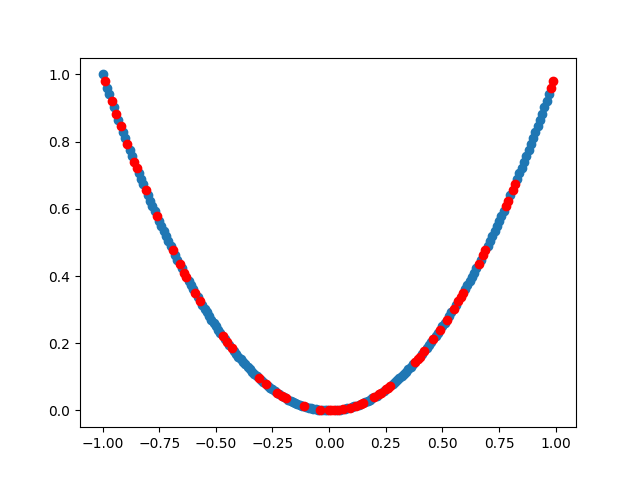

In [18]:
# 저장된 이미지를 불러와서 출력
# Ipython -> 1줄씩 출력
from IPython.display import Image
display(Image("test_png/img_test.png"))

# 매직 명령어 사용

In [19]:
%time
print("#########################################################################")
%ls
print("#########################################################################")
%pwd

CPU times: total: 0 ns
Wall time: 0 ns
#########################################################################
 D 드라이브의 볼륨: 백업디스크
 볼륨 일련 번호: 080F-4620

 D:\ai_exam\cnn_exam 디렉터리

2024-05-21  오전 09:04    <DIR>          .
2024-05-21  오전 09:04    <DIR>          ..
2024-05-21  오전 09:02    <DIR>          .ipynb_checkpoints
2024-05-20  오후 04:36            16,694 best_model_h5.keras
2024-05-20  오후 03:43    <DIR>          data_tf
2024-05-21  오전 09:04            23,605 img_test.png
2024-05-20  오후 01:18           773,200 mnist_cnn_20240517_epochs_50_9876.h5
2024-05-20  오후 01:04            32,294 model.png
2024-05-20  오후 05:30    <DIR>          nbtpy
2024-05-20  오후 01:03    <DIR>          num_jpg
2024-05-20  오후 01:41             3,009 requirement.txt
2024-05-20  오후 03:14             4,331 tensor_odbr.ipynb
2024-05-20  오후 01:19           315,951 tensorflow_cnn.ipynb
2024-05-17  오후 01:12           111,006 tensorflow_linear.ipynb
2024-05-20  오후 05:29           737,881 tensorflow_module.ipynb
2024-

'D:\\ai_exam\\cnn_exam'

# 학습 시간 출력

In [20]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer='SGD', loss='mse', metrics=['mse'])

C:\Users\hi\anaconda3\envs\p310_cnn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# 시간 체크
start_time = time.time() # 시작

# 모델 학습
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20) # verbose -> 0으로 놓으면 과정 출력 X

# 학습 종료
print("학습 시간 : {}".format(time.time() - start_time)) # 현재시간 - 시작시간 = 학습시간


학습 시간 : 13.167914152145386


# 데이터를 sin으로 변경해서 처리

In [22]:
# 데이터 sin 처리하는 함수
def get_sin_data(start = 0, end = 10, step = 0.1):
    x = np.arange(start, end, step)
    np.random.shuffle(x)
    y = np.sin(x)

    split_index = int(x.shape[0]*0.6)

    train_x, test_x = x[:split_index], x[split_index:]
    train_y, test_y = y[:split_index], y[split_index:]

    return (train_x, train_y), (test_x, test_y) # 그룹으로 묶어서 return

In [23]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

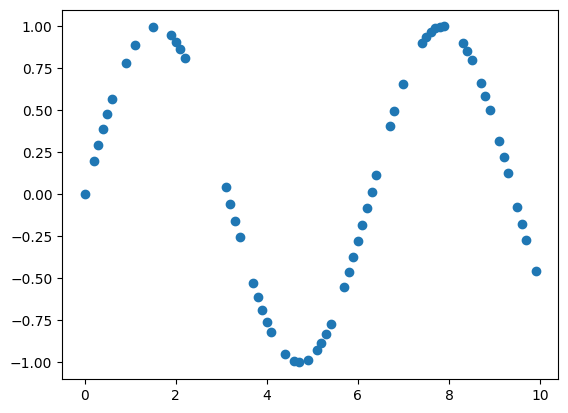

In [24]:
plt.scatter(train_x, train_y)
plt.show()

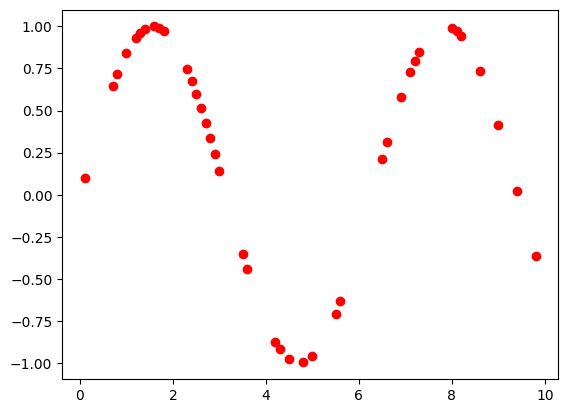

In [25]:
plt.scatter(test_x, test_y, color = 'r')
plt.show()

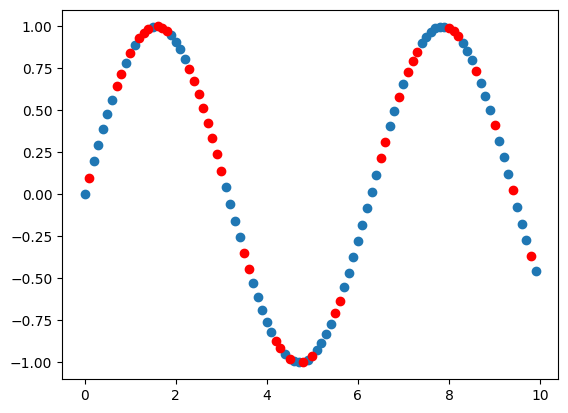

In [26]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color = 'r')
plt.show()

In [ ]:
# 모델 신규 생성
model1 = keras.Sequential()
model1.add(Dense(10, activation='tanh', input_shape=(1,)))
model1.add(Dense(10, activation='tanh'))
model1.add(Dense(1))

model1.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model1.summary()

start_time = time.time()

model1.fit(train_x, train_y, epochs=1000, verbose=0, batch_size = 20)
print("학습시간 : {}".format(time.time() - start_time))

# 결과 보기

In [28]:
loss, mse = model1.evaluate(test_x, test_y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.1115 - mse: 0.1115   


In [29]:
print("loss = ", loss)
print("mse = ", mse)

loss =  0.10778399556875229
mse =  0.10778399556875229


In [30]:
rst = model1.predict(test_x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


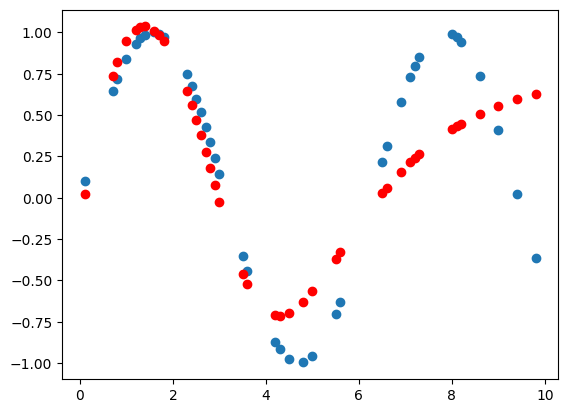

In [31]:
plt.scatter(test_x, test_y)
plt.scatter(test_x, rst, color = 'r')
plt.show()

# 틀어진 그래프를 조정하여 맞추는 방법

In [32]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size = 20):
    start_time = time.time()
    model1.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
    print("학습 진행 : {}".format(time.time() - start_time))

    rst = model.predict(test_x)

    plt.scatter(test_x, test_y)
    plt.scatter(test_x, rst, color='r')
    plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
    for i in range(n):
        print(f"{i} 번째 학습중...")
        fit_one_more(model, train_x, train_y, test_x, test_y)

In [ ]:
# 1000번씩 10번 학습하는 과정을 그래프로 표기
fit_n_times(model1, train_x, train_y, test_x, test_y, 10)

0 번째 학습중...


# GPU가 있는 경우[batch 개수가 1, 2, 5, 10, 20, 50, 100]

In [ ]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(1,)))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1))

    model.compile(optimizer='SGD', loss='mse', metrics=['mse'])

    return model

def fit_batch_size(train_x, train_y, test_x, test_y, batch_sizes):
    for batch in batch_sizes:
        model = build_model()
        print(f"batch_size 크기 : {batch}")
        fit_one_more(model, train_x, train_y, test_x, test_y, batch)


In [ ]:
fit_batch_size(train_x, train_y, test_x, test_y, batch_sizes=[1, 2, 5, 10, 20, 50, 100])

# 데이터 크기가 영향을 주는지 확인

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

In [ ]:
# 모델 신규 생성
model2 = keras.Sequential()
model2.add(Dense(10, activation='tanh', input_shape=(1,)))
model2.add(Dense(10, activation='tanh'))
model2.add(Dense(1))

model2.compile(optimizer='SGD', loss='mse', metrics=['mse'])

start_time = time.time()
history = model2.fit(train_x, train_y, epochs=100, verbose=2, batch_size=20)
print("학습 시간 : {}".format(time.time() - start_time))

In [ ]:
rst = model2.predict(test_x)

plt.scatter(train_x, train_y)
plt.scatter(test_x, rst, color = 'r')
plt.show()


In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.001)

In [ ]:
# 모델 신규 생성
model3 = keras.Sequential()
model3.add(Dense(10, activation='tanh', input_shape=(1,)))
model3.add(Dense(10, activation='tanh'))
model3.add(Dense(1))

model3.compile(optimizer='SGD', loss='mse', metrics=['mse'])

start_time = time.time()
history = model3.fit(train_x, train_y, epochs=100, verbose=2, batch_size=20)
print("학습 시간 : {}".format(time.time() - start_time))

In [ ]:
rst = model3.predict(test_x)

plt.scatter(train_x, train_y)
plt.scatter(test_x, rst, color = 'r')
plt.show()


# OverFitting, DropOut, BatchNormalization, Regularization 처리 방법

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
x, y = make_moons(n_samples=200, noise=0.2, random_state=64)

In [ ]:
x

In [ ]:
df = pd.DataFrame(dict(x = x[:,0], y = x[:, 1], label = y))

# 데이터를 이미지로 표시하는 시각화

In [ ]:
fig, ax = plt.subplots()
group = df.groupby('label')
colors = ['red', 'green']

for idx, group in groups:
    group.plot(ax = ax, kind = 'scatter', y = 'y', label = idx, color = colors[idx])

plt.show()

# 데이터 Train, test 분리

In [171]:
split_index = int(len(x)*0.7)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [172]:
(train_x.shape, train_y.shape), (test_x.shape, test_y.shape)

(((140, 2), (140,)), ((60, 2), (60,)))

In [190]:
# Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.regularizers import l1, l2

model5 = keras.Sequential()
model5.add(Dense(20, input_shape=(2,), activation='relu', kernel_regularizer=l2(0.001)))
model5.add(Dropout(0.3)) # 6을 넘어가면 안됨
model5.add(BatchNormalization())
model5.add(Dense(20, activation='relu', kernel_regularizer=l2(0.001)))
model5.add(Dropout(0.3)) # 시그모이드 하기 전가지 히든 레이어에서 사용
model5.add(BatchNormalization())
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model5.fit(train_x, train_y, epochs = 1000, verbose = 0, batch_size = 100, validation_data = (test_x, test_y))

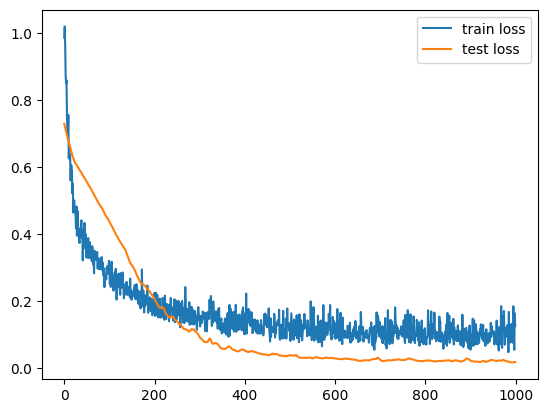

In [191]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
# plt.savefig('data_tf/Dropout.png') 
# plt.savefig('data_tf/BatchNo.png') 
plt.savefig('data_tf/Regularization.png') 

plt.legend()
plt.show()

# 콜백 함수

In [218]:
# 학습중 다양한 명령을 수행하고 싶을 때 사용하는 함수
from tensorflow.keras.callbacks import Callback

In [219]:
x = np.arange(-1, 1, 0.01)
np.random.shuffle(x)
y = x ** 2

In [220]:
split_index = int(x.shape[0]*0.6)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [221]:
(train_x.shape, test_x.shape), (train_y.shape, test_y.shape)

(((120,), (80,)), ((120,), (80,)))

In [222]:
# 콜백 함수 생성
def train_callbacks(callbacks):
    model = keras.Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(1,)))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1))
    model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
    
    start_time = time.time()
    model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, callbacks=callbacks)
    print("학습 시간 : {}".format(time.time() - start_time))

In [223]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [224]:
check_point = ModelCheckpoint("./best_model_h5.keras", monitor="val_loss", mode = "auto", save_best_only=True)

In [225]:
train_callbacks([check_point])

학습 시간 : 56.1355504989624


# 디스플레이 처리

In [226]:
from IPython.display import clear_output

In [228]:
class PlotLosses(Callback):
  def on_train_begin(self, logs={}):
      
      self.i = 0    
      self.x = []    
      self.losses = []    
      self.val_losses = []
      self.fig = plt.figure()
      self.logs = []

  def on_epoch_end(self, epoch, logs={}):
      self.logs.append(logs)
      self.x.append(self.i)
      self.losses.append(logs.get('loss'))    
      self.val_losses.append(logs.get('val_loss'))    
      self.i += 1
      clear_output(wait=True)    
      plt.plot(self.x, self.losses, label="loss")   
      plt.plot(self.x, self.val_losses, label="val_loss")    
      plt.legend()    
      plt.show();    
      print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])
        

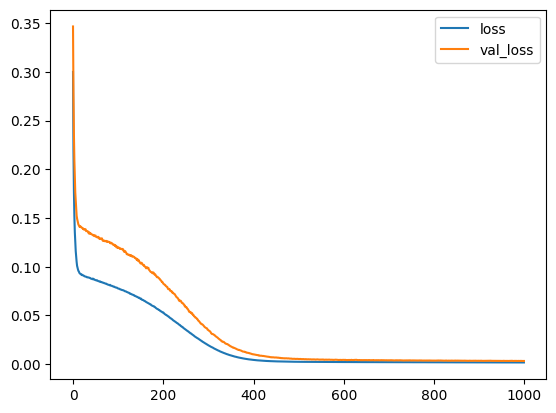

loss =  0.0016853249398991466 , val_loss =  0.0032138151582330465
학습 시간 : 204.19889426231384


In [229]:
plt_loss = PlotLosses()
train_callbacks([plt_loss])